In [1]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
desmat = pd.read_csv('simplified_events/sub-130_task-surveyMedley_design-matrix.csv')
desmat = desmat.drop(columns=['Unnamed: 0'])

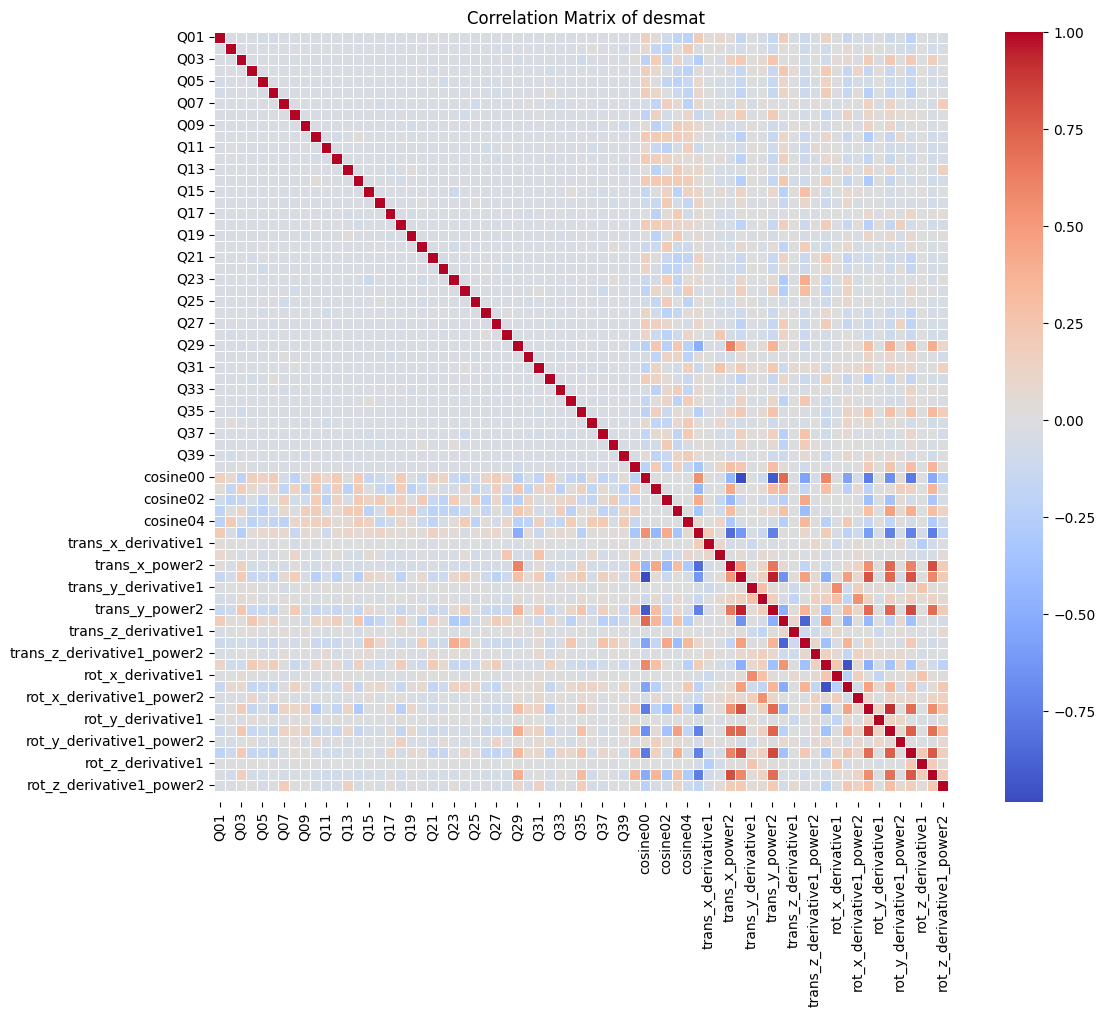

In [3]:
# Calculate the correlation matrix
corr_matrix = desmat.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of desmat')
plt.show()


## Focus on the VIF of Q01 for different models

### Model: full model

In [4]:
Y = desmat['Q01']
X = desmat.drop(columns=['Q01'])
model = sm.OLS(Y, X).fit()
print(f'VIF={1/(1-model.rsquared)}')
print(model.summary())

VIF=11.47551771161989
                            OLS Regression Results                            
Dep. Variable:                    Q01   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     82.11
Date:                Thu, 05 Dec 2024   Prob (F-statistic):          1.81e-240
Time:                        11:17:19   Log-Likelihood:                 1070.8
No. Observations:                 602   AIC:                            -2004.
Df Residuals:                     533   BIC:                            -1700.
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

### Model: Task regressors only

In [5]:
Y = desmat['Q01']
X = desmat.drop(columns=['Q01'])
X = X.filter(regex='^Q|constant')
model = sm.OLS(Y, X).fit()
print(f'VIF={1/(1-model.rsquared)}')
print(model.summary())

VIF=1.4929064680671587
                            OLS Regression Results                            
Dep. Variable:                    Q01   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     7.103
Date:                Thu, 05 Dec 2024   Prob (F-statistic):           2.43e-29
Time:                        11:17:19   Log-Likelihood:                 456.93
No. Observations:                 602   AIC:                            -833.9
Df Residuals:                     562   BIC:                            -657.9
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Q02           -0.3262      0.

### Model: Task regressors and HP filter

In [6]:
Y = desmat['Q01']
X = desmat.drop(columns=['Q01'])
X = X.filter(regex='^(Q|cosine|constant)')
model = sm.OLS(Y, X).fit()
print(f'VIF={1/(1-model.rsquared)}')
print(model.summary())


VIF=9.946385206930486
                            OLS Regression Results                            
Dep. Variable:                    Q01   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     113.3
Date:                Thu, 05 Dec 2024   Prob (F-statistic):          1.49e-247
Time:                        11:17:19   Log-Likelihood:                 1027.8
No. Observations:                 602   AIC:                            -1966.
Df Residuals:                     557   BIC:                            -1768.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Q02           -0.0679      0.0

### Model: Task regressors and motion regressors

In [7]:
Y = desmat['Q01']
X = desmat.drop(columns=['Q01'])
X = X.filter(regex='^(Q|trans|rot|constant)')
model = sm.OLS(Y, X).fit()
print(f'VIF={1/(1-model.rsquared)}')
print(model.summary())

VIF=4.068687926741488
                            OLS Regression Results                            
Dep. Variable:                    Q01   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     26.21
Date:                Thu, 05 Dec 2024   Prob (F-statistic):          1.06e-126
Time:                        11:17:20   Log-Likelihood:                 758.72
No. Observations:                 602   AIC:                            -1389.
Df Residuals:                     538   BIC:                            -1108.
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

## Unfortunately the highpass filter has the most impact

### Use only the first 2 cosine terms (this is effectively allowing more of the higher frequency components to remain)

VIF is controlled if only the first 2 cosines are used (I'm unsure what frequency cutoff that would be paired with)

In [8]:
Y = desmat['Q01']
X = desmat.drop(columns=['Q01'])
X = X.filter(regex='^(Q|cosine00|cosine01|cosine02|constant)')
model = sm.OLS(Y, X).fit()
print(f'VIF={1/(1-model.rsquared)}')
print(model.summary())

VIF=3.9788700647155353
                            OLS Regression Results                            
Dep. Variable:                    Q01   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     39.65
Date:                Thu, 05 Dec 2024   Prob (F-statistic):          5.29e-140
Time:                        11:17:20   Log-Likelihood:                 752.00
No. Observations:                 602   AIC:                            -1418.
Df Residuals:                     559   BIC:                            -1229.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Q02           -0.9228      0.

### Model: Task regressors, first 3 cosines, motion regressors

In [9]:
Y = desmat['Q01']
X = desmat.drop(columns=['Q01'])
X = X.filter(regex='^(Q|cosine00|cosine01|cosine02|trans|rot|constant)')
model = sm.OLS(Y, X).fit()
print(f'VIF={1/(1-model.rsquared)}')
print(model.summary())

VIF=5.9374037850791685
                            OLS Regression Results                            
Dep. Variable:                    Q01   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     40.02
Date:                Thu, 05 Dec 2024   Prob (F-statistic):          3.88e-167
Time:                        11:17:20   Log-Likelihood:                 872.48
No. Observations:                 602   AIC:                            -1611.
Df Residuals:                     535   BIC:                            -1316.
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

### Model: All task regressors, first 3 cosine regressors trans/rot, trans/rot deriv but no trans/rot power2

In [10]:
Y = desmat['Q01']
X = desmat.drop(columns=['Q01'])
X = X.filter(regex='^(Q|cosine00|cosine01|cosine02|trans|rot|constant)')
X = X.loc[:, ~X.columns.str.endswith('power2')]
model = sm.OLS(Y, X).fit()
print(f'VIF={1/(1-model.rsquared)}')
print(model.summary())

VIF=4.894449119469833
                            OLS Regression Results                            
Dep. Variable:                    Q01   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     39.45
Date:                Thu, 05 Dec 2024   Prob (F-statistic):          1.23e-154
Time:                        11:17:20   Log-Likelihood:                 814.34
No. Observations:                 602   AIC:                            -1519.
Df Residuals:                     547   BIC:                            -1277.
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Q02         

## Look at all subject/question VIFs for old and new design (3 cosines + trans/rot + trans/rot deriv)

In [11]:
def est_vif(X):
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["features"] = X.columns
    return vif

def est_new_old_vif(desmat_path):
    subid = desmat_path.split('-')[1].split('_')[0]
    desmat = pd.read_csv(desmat_path)
    desmat = desmat.drop(columns=['Unnamed: 0'])
    newdes = desmat.copy()
    newdes = newdes.filter(regex='^(Q|cosine00|cosine01|cosine02|trans|rot|constant)')
    newdes = newdes.loc[:, ~newdes.columns.str.endswith('power2')]
    vif_old = est_vif(desmat)
    vif_old['model'] = 'old'
    vif_new = est_vif(newdes)
    vif_new['model'] = 'new'
    all_vifs = pd.concat([vif_old, vif_new], axis=0)
    all_vifs['subid'] = subid
    return all_vifs


In [12]:
desmat_paths = glob.glob('simplified_events/sub-*_task-surveyMedley_design-matrix.csv')

for desmat_path in desmat_paths:
    vif_loop = est_new_old_vif(desmat_path)
    if desmat_path == desmat_paths[0]:
        all_vifs = vif_loop
    else:  
        all_vifs = pd.concat([all_vifs, vif_loop])

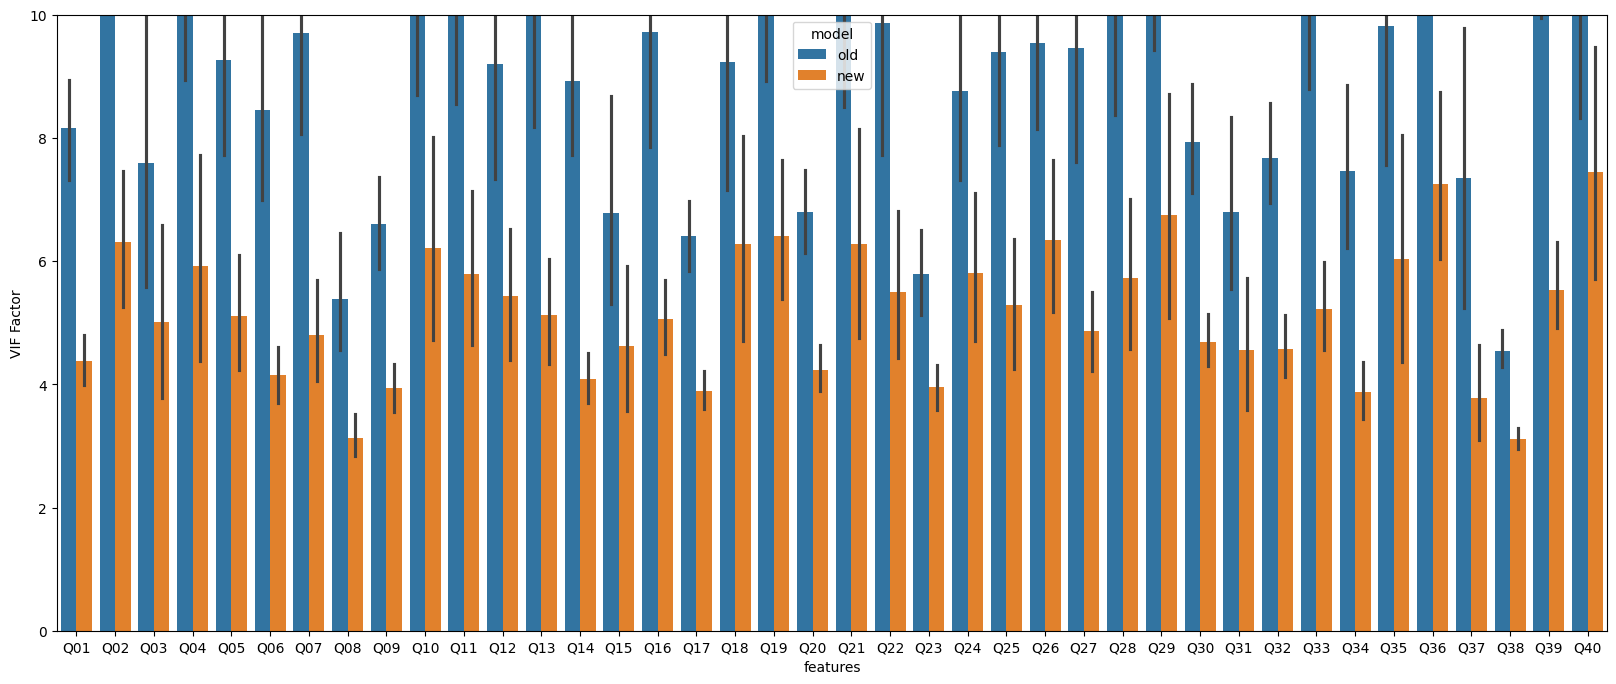

In [13]:
q_vifs = all_vifs[all_vifs['features'].str.startswith('Q')]

plt.figure(figsize=(20, 8))
sns.barplot(x='features', y='VIF Factor', hue='model', data=q_vifs)
plt.ylim(0, 10)
plt.show()

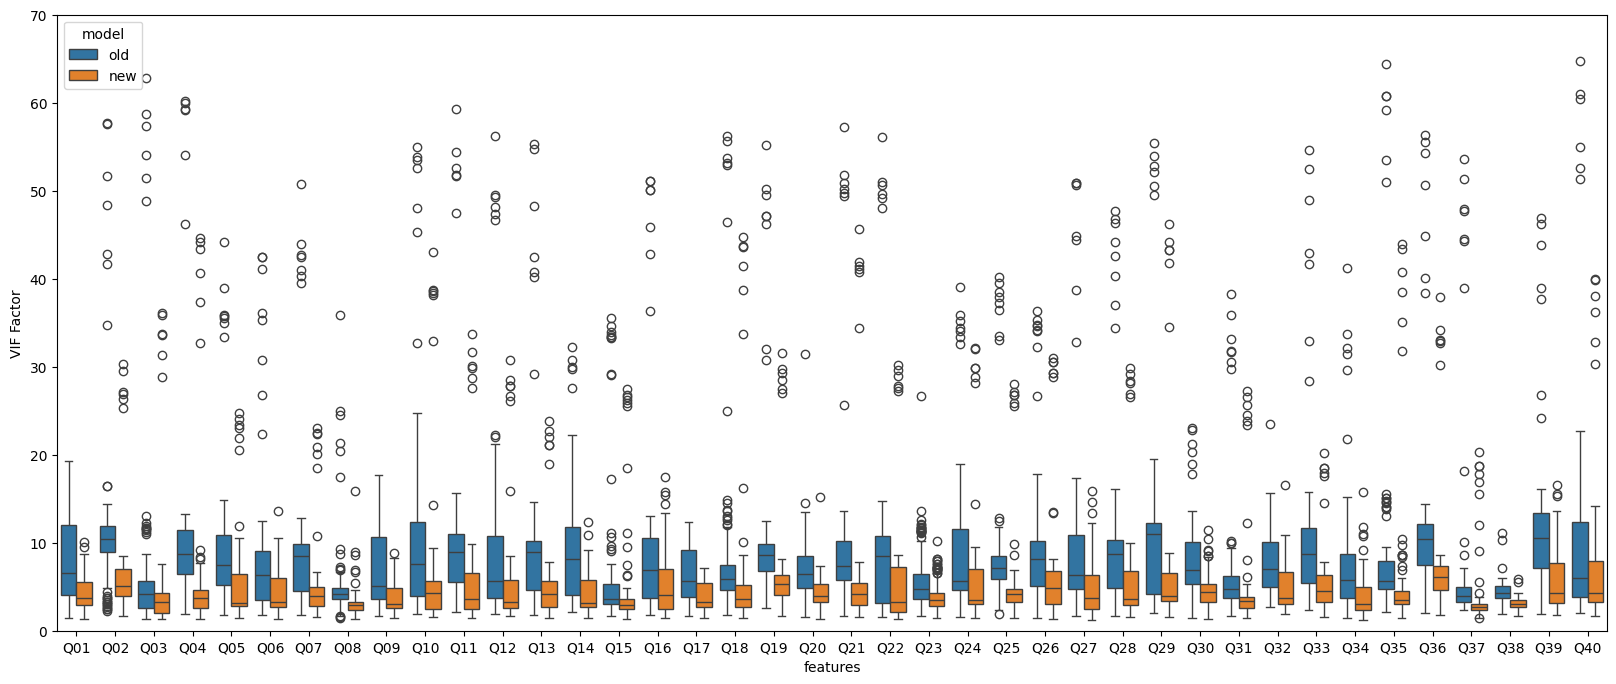

In [14]:
plt.figure(figsize=(20, 8))
sns.boxplot(x='features', y='VIF Factor', hue='model', data=q_vifs)
plt.ylim(0, 70)
plt.show()

/var/folders/y4/qn1yzt191kb4h4vwfbmgvt340000gn/T/ipykernel_78596/104283121.py:3: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(x='features', y='VIF Factor', hue='model', data=q_vifs, jitter=False, dodge=True, edgecolor='gray' )


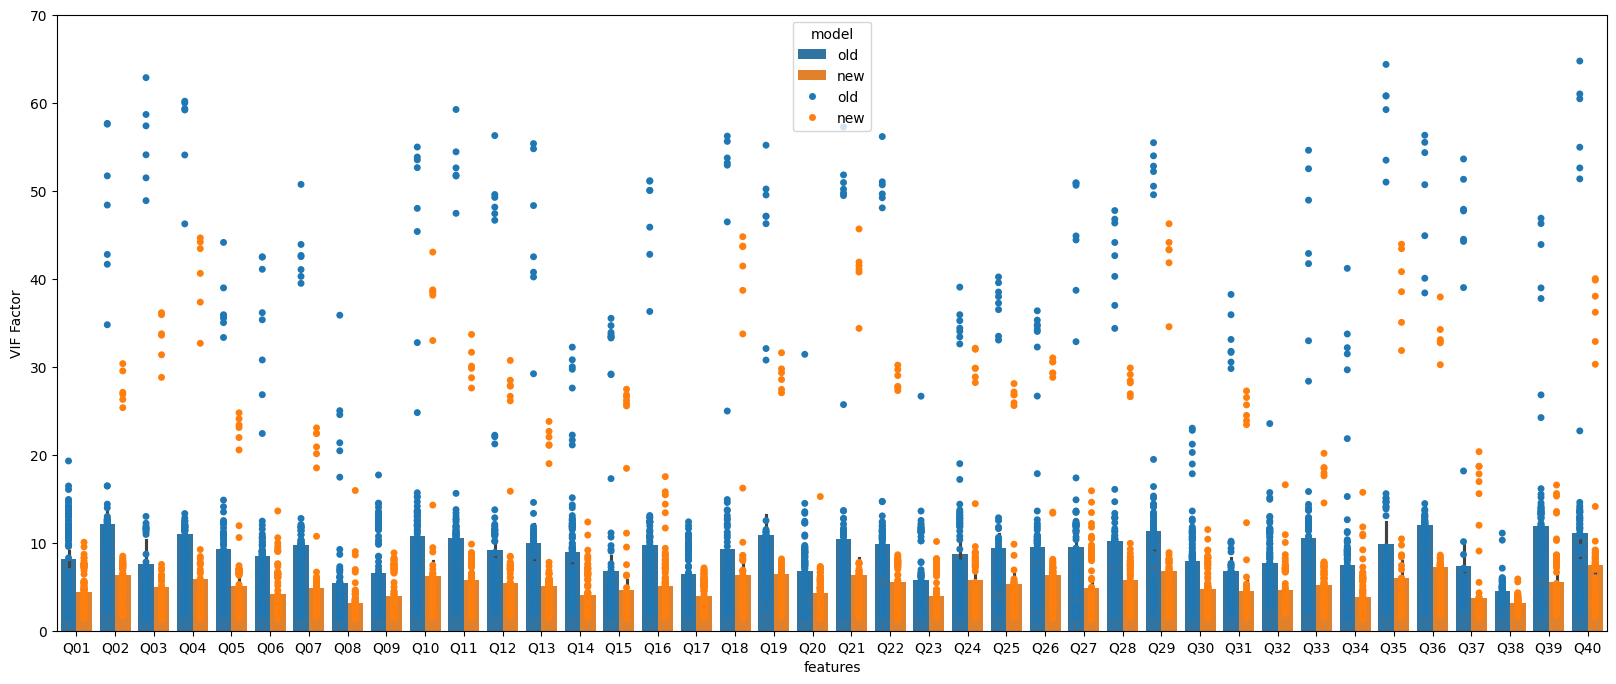

In [15]:
plt.figure(figsize=(20, 8))
sns.barplot(x='features', y='VIF Factor', hue='model', data=q_vifs)
sns.stripplot(x='features', y='VIF Factor', hue='model', data=q_vifs, jitter=False, dodge=True, edgecolor='gray' )

plt.ylim(0, 70)
plt.show()

### Compare no confounds to cosines only
Trying to isolate the cause of the collinearity

In [16]:
def est_no_confound_vif(desmat_path):
    subid = desmat_path.split('-')[1].split('_')[0]
    desmat = pd.read_csv(desmat_path)
    desmat = desmat.drop(columns=['Unnamed: 0'])
    desmat_no_confound = desmat.filter(regex='^(Q|constant)')
    newdes = desmat.copy()
    newdes = newdes.filter(regex='^(Q|cosine00|cosine01|cosine02|constant)')
    vif_old = est_vif(desmat_no_confound)
    vif_old['model'] = 'no_confound'
    vif_new = est_vif(newdes)
    vif_new['model'] = 'cosine_only'
    all_vifs = pd.concat([vif_old, vif_new], axis=0)
    all_vifs['subid'] = subid
    return all_vifs

In [17]:
# Same but comparing no confounds to no highpass filter only
for desmat_path in desmat_paths:
    vif_loop = est_no_confound_vif(desmat_path)
    if desmat_path == desmat_paths[0]:
        all_vifs_no_conf = vif_loop
    else:  
        all_vifs_no_conf = pd.concat([all_vifs_no_conf, vif_loop])

/var/folders/y4/qn1yzt191kb4h4vwfbmgvt340000gn/T/ipykernel_78596/1908262226.py:5: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(x='features', y='VIF Factor', hue='model', data=q_vifs_no_conf, jitter=False, dodge=True, edgecolor='gray' )


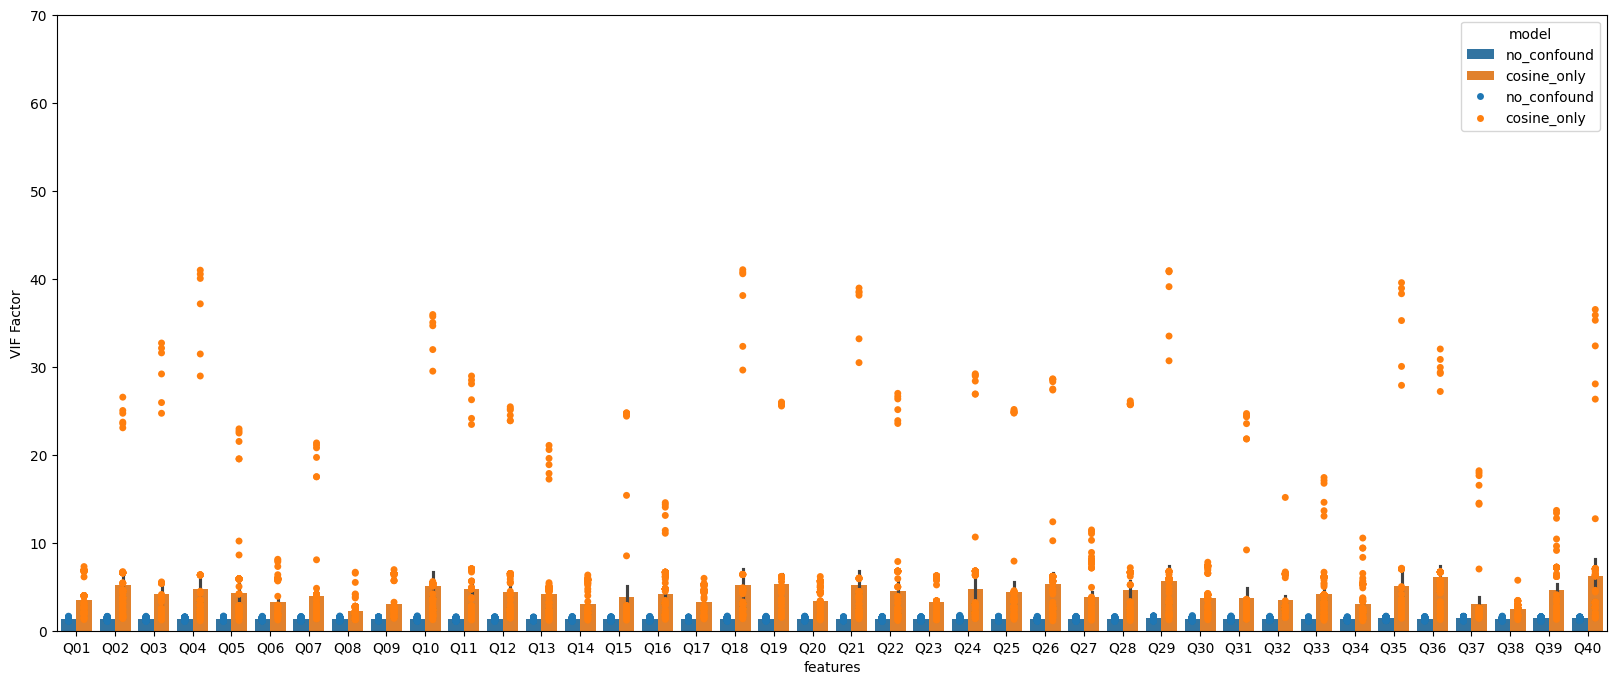

In [18]:
q_vifs_no_conf = all_vifs_no_conf[all_vifs_no_conf['features'].str.startswith('Q')]

plt.figure(figsize=(20, 8))
sns.barplot(x='features', y='VIF Factor', hue='model', data=q_vifs_no_conf)
sns.stripplot(x='features', y='VIF Factor', hue='model', data=q_vifs_no_conf, jitter=False, dodge=True, edgecolor='gray' )

plt.ylim(0, 70)
plt.show()

/var/folders/y4/qn1yzt191kb4h4vwfbmgvt340000gn/T/ipykernel_78596/2003577849.py:3: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(x='features', y='VIF Factor', hue='model', data=q_vifs_no_conf[q_vifs_no_conf['model'] == 'cosine_only'], alpha=.4, jitter=False, dodge=True, edgecolor='gray' )


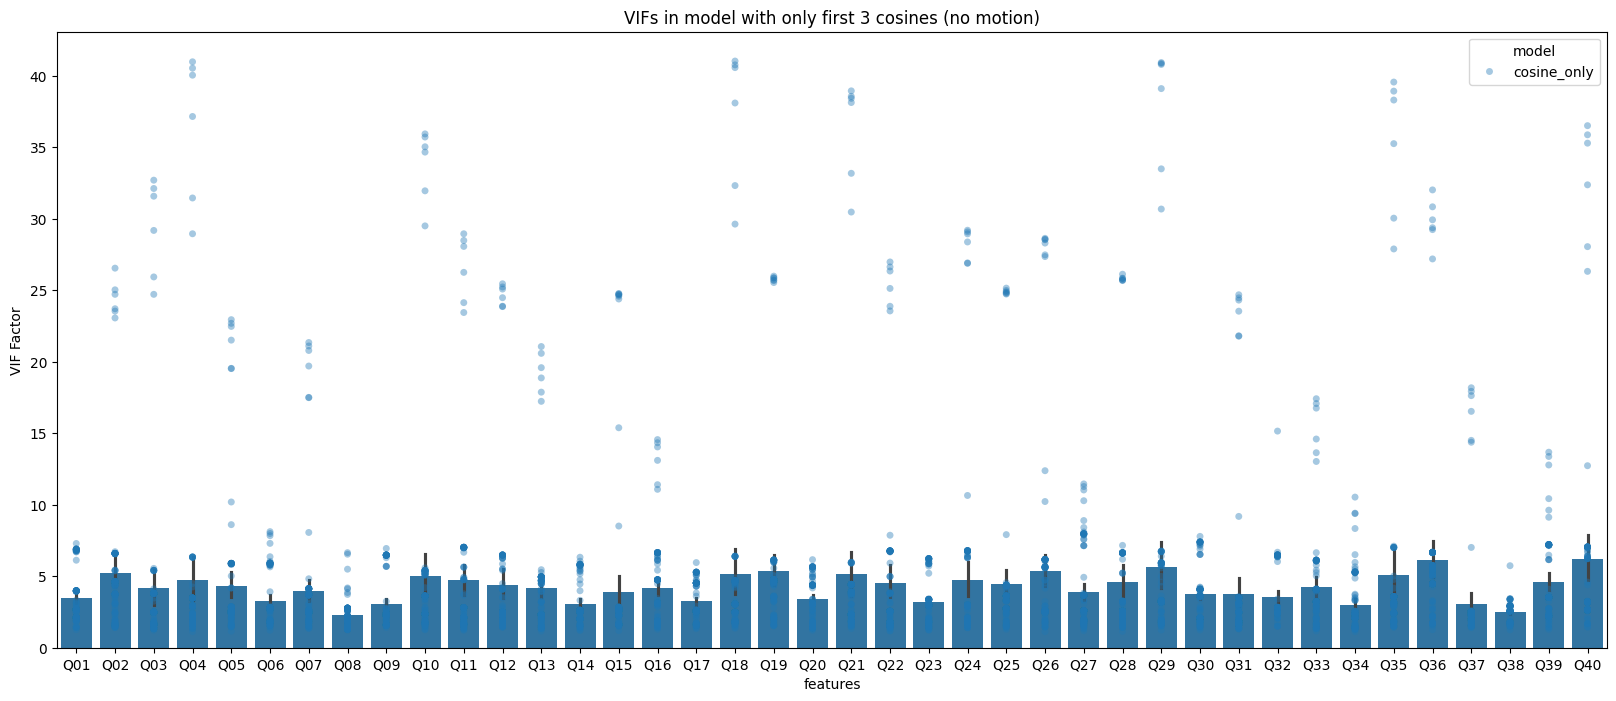

In [19]:

plt.figure(figsize=(20, 8))
sns.barplot(x='features', y='VIF Factor', data=q_vifs_no_conf[q_vifs_no_conf['model'] == 'cosine_only'])
sns.stripplot(x='features', y='VIF Factor', hue='model', data=q_vifs_no_conf[q_vifs_no_conf['model'] == 'cosine_only'], alpha=.4, jitter=False, dodge=True, edgecolor='gray' )
plt.title('VIFs in model with only first 3 cosines (no motion)')
#plt.ylim(0, 30)
plt.show()

## Looking at the ITIs a bit

In [20]:
events_paths = glob.glob('simplified_events/sub-*-events.csv')

In [21]:
def get_sorted_onsets(event_path):
    event_file = pd.read_csv(event_path)
    event_onsets = event_file.filter(like='onset')
    event_onsets.columns = event_onsets.columns.str.replace('_onset', '')
    event_onsets = pd.melt(event_onsets, var_name='question', value_name='onset')
    event_onsets = event_onsets.dropna(subset=['onset'])
    event_onsets_sorted = event_onsets.sort_values(by=['onset'], ignore_index=True)
    return event_onsets_sorted

In [22]:
def check_designs(event_path, sorted_onsets, unique_design_info, design_count):
    found_match = False
    for key, value in unique_design_info.items():
        if sorted_onsets['onset'].equals(value['onsets']['onset']):
            unique_design_info[key]['path'].append(event_path)
            found_match = True
    if found_match == False:
        unique_design_info[f'design_{design_count}'] = {}
        unique_design_info[f'design_{design_count}']['onsets'] = sorted_onsets
        unique_design_info[f'design_{design_count}']['path'] = []
        unique_design_info[f'design_{design_count}']['path'].append(event_path)
        design_count = design_count + 1
    return unique_design_info, design_count

In [23]:
unique_design_info = {}
design_count = 0
for ind, event_path in enumerate(events_paths):
    sorted_onsets = get_sorted_onsets(event_path)
    if ind == 0:
        unique_design_info[f'design_{design_count}'] = {}
        unique_design_info[f'design_{design_count}']['onsets'] = sorted_onsets
        unique_design_info[f'design_{design_count}']['path'] = []
        unique_design_info[f'design_{design_count}']['path'].append(event_path)
    else:
        unique_design_info, design_count = check_designs(event_path, sorted_onsets, unique_design_info, design_count)

In [24]:
def get_iti(event_path):
    sorted_onsets = get_sorted_onsets(event_path)
    subid = event_path.split('sub-')[1].split('_')[0]
    sorted_onsets['subid'] = subid
    sorted_onsets['iti_before'] = sorted_onsets['onset'].diff() - 8.5
    sorted_onsets['iti_after'] = sorted_onsets['onset'].diff(periods=-1).abs() - 8.5  
    sorted_onsets = sorted_onsets.reset_index(names='trial_number')
    return sorted_onsets

In [25]:
for event_path in events_paths:
    question_iti = get_iti(event_path)
    if event_path == events_paths[0]:
        all_iti = question_iti
    else:
        all_iti = pd.concat([all_iti, question_iti])
print(all_iti.shape)

(3993, 6)


In [26]:
#all_iti = all_iti.reset_index(drop=True)
all_iti = all_iti.sort_values(by='question').reset_index(drop=True)
all_iti['total_iti'] = all_iti['iti_before'] + all_iti['iti_after']


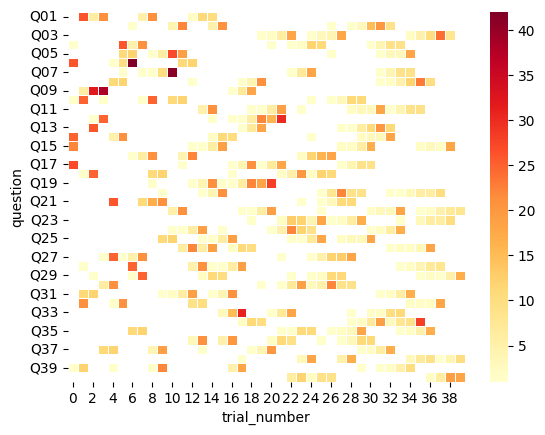

In [27]:
question_by_trial_number = pd.crosstab(all_iti['question'], all_iti['trial_number'])
question_by_trial_number = question_by_trial_number.replace(0, np.nan)
sns.heatmap(question_by_trial_number, cmap='YlOrRd', linewidths=0.5)
plt.savefig('/Users/jeanettemumford/Desktop/question_by_trial_number_counts.pdf')
plt.show()

(40, 103)


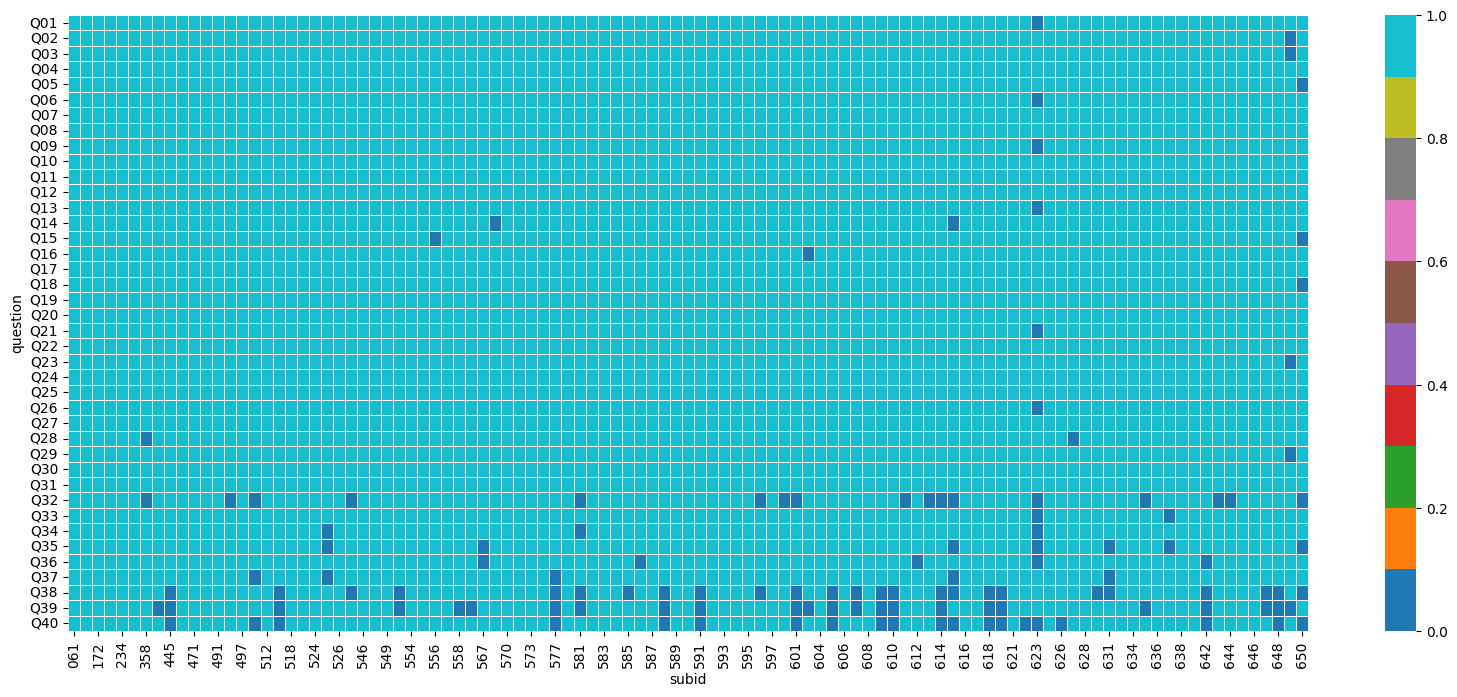

In [28]:

sub_by_question = pd.crosstab( all_iti['question'], all_iti['subid']).astype(int)
print(sub_by_question.shape)
#sub_by_question = sub_by_question.replace(0, np.nan)
plt.figure(figsize=(20, 8))
sns.heatmap(sub_by_question, cmap='tab10', linewidths=0.5)
plt.show()

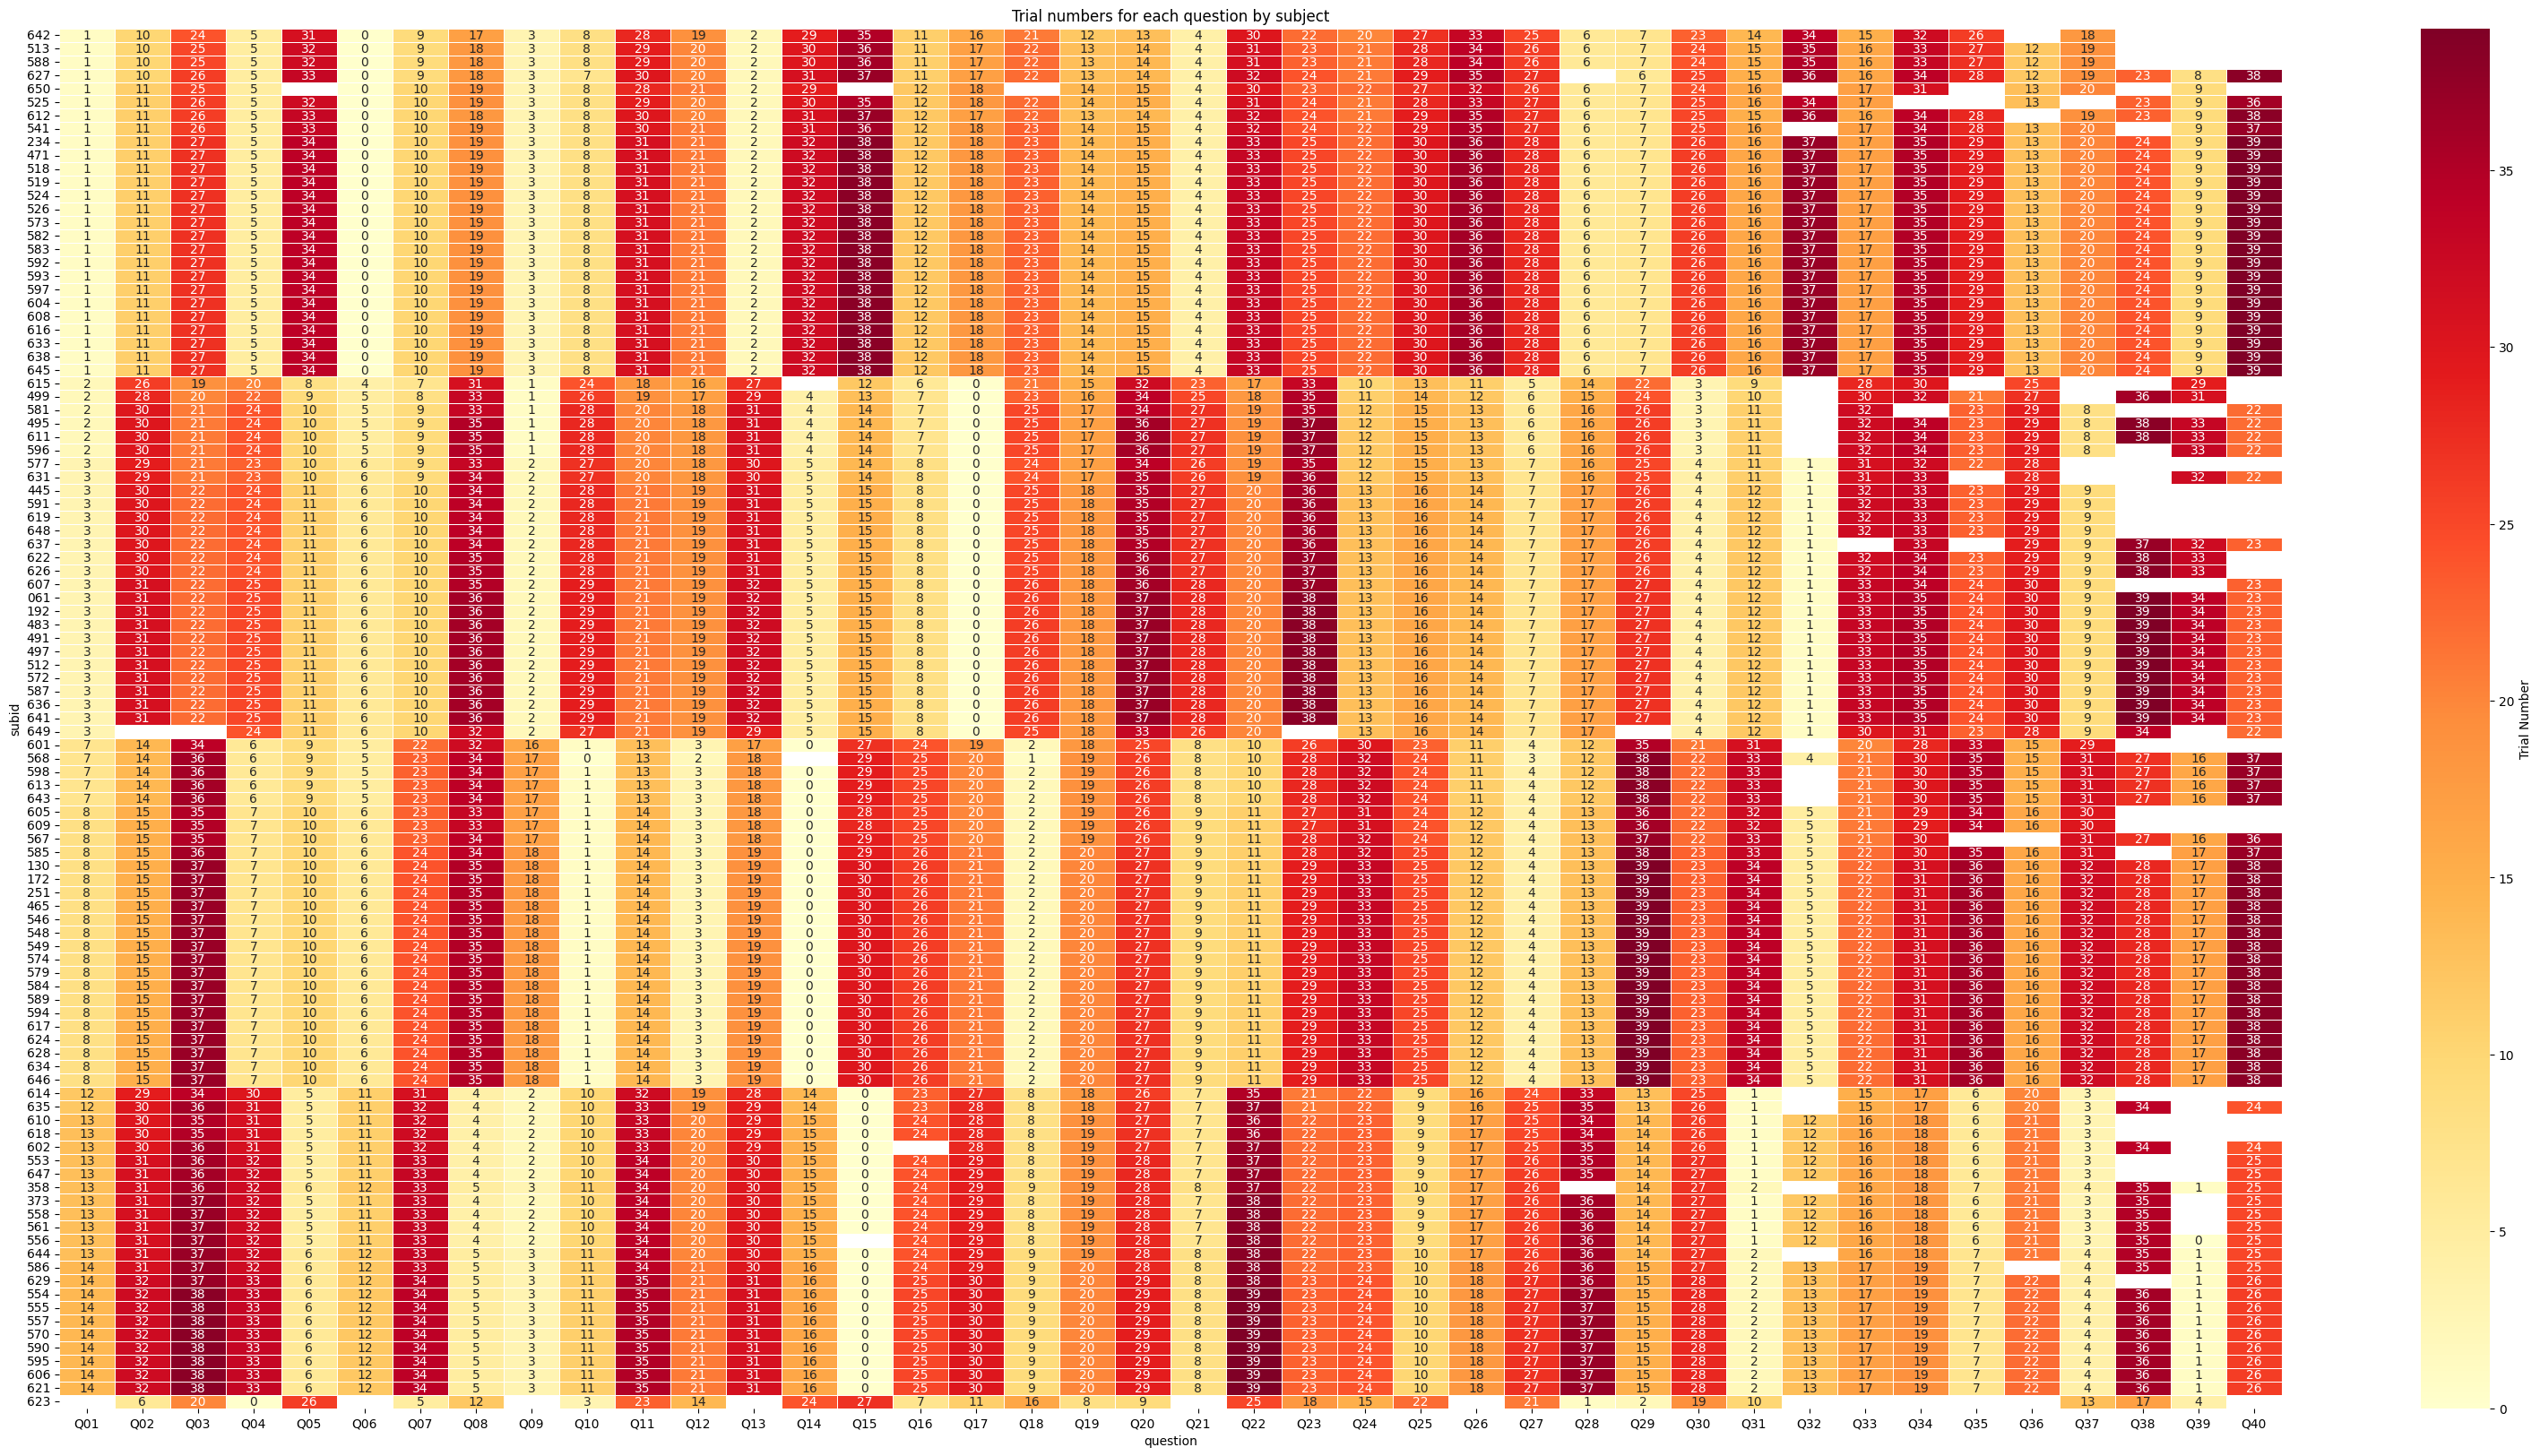

In [29]:
# heatmap where intensity is trial number for each question

dat_question_trial_number = all_iti[['question', 'trial_number', 'subid']].copy().reset_index(drop=True)
dat_sub_by_question = pd.pivot(dat_question_trial_number, index='subid', columns='question', values='trial_number')
dat_sub_by_question = dat_sub_by_question.sort_values(by=list(dat_sub_by_question.columns), axis=0)
plt.figure(figsize=(40, 20))
sns.heatmap(dat_sub_by_question, cmap='YlOrRd', linewidths=0.5, annot=True, cbar_kws={'label': 'Trial Number'})
plt.title('Trial numbers for each question by subject')
plt.savefig('/Users/jeanettemumford/Desktop/trial_numbers_by_question_by_subject.pdf')
plt.show()

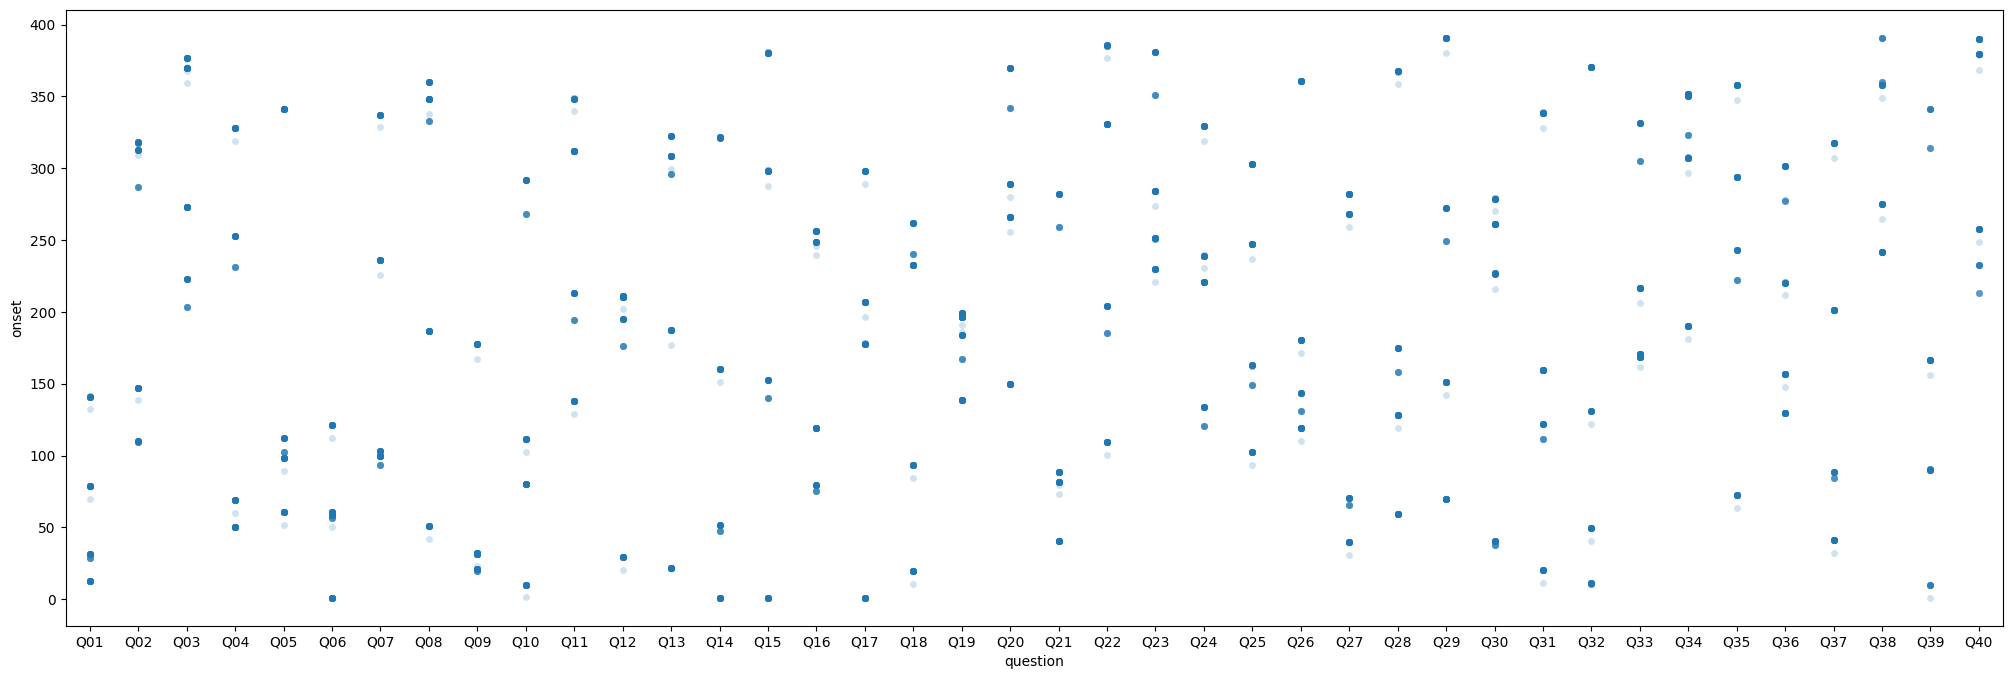

In [30]:
plt.figure(figsize=(25, 8))
sns.stripplot(x='question', y='onset', data=all_iti, alpha=.2, jitter=False)
plt.show()

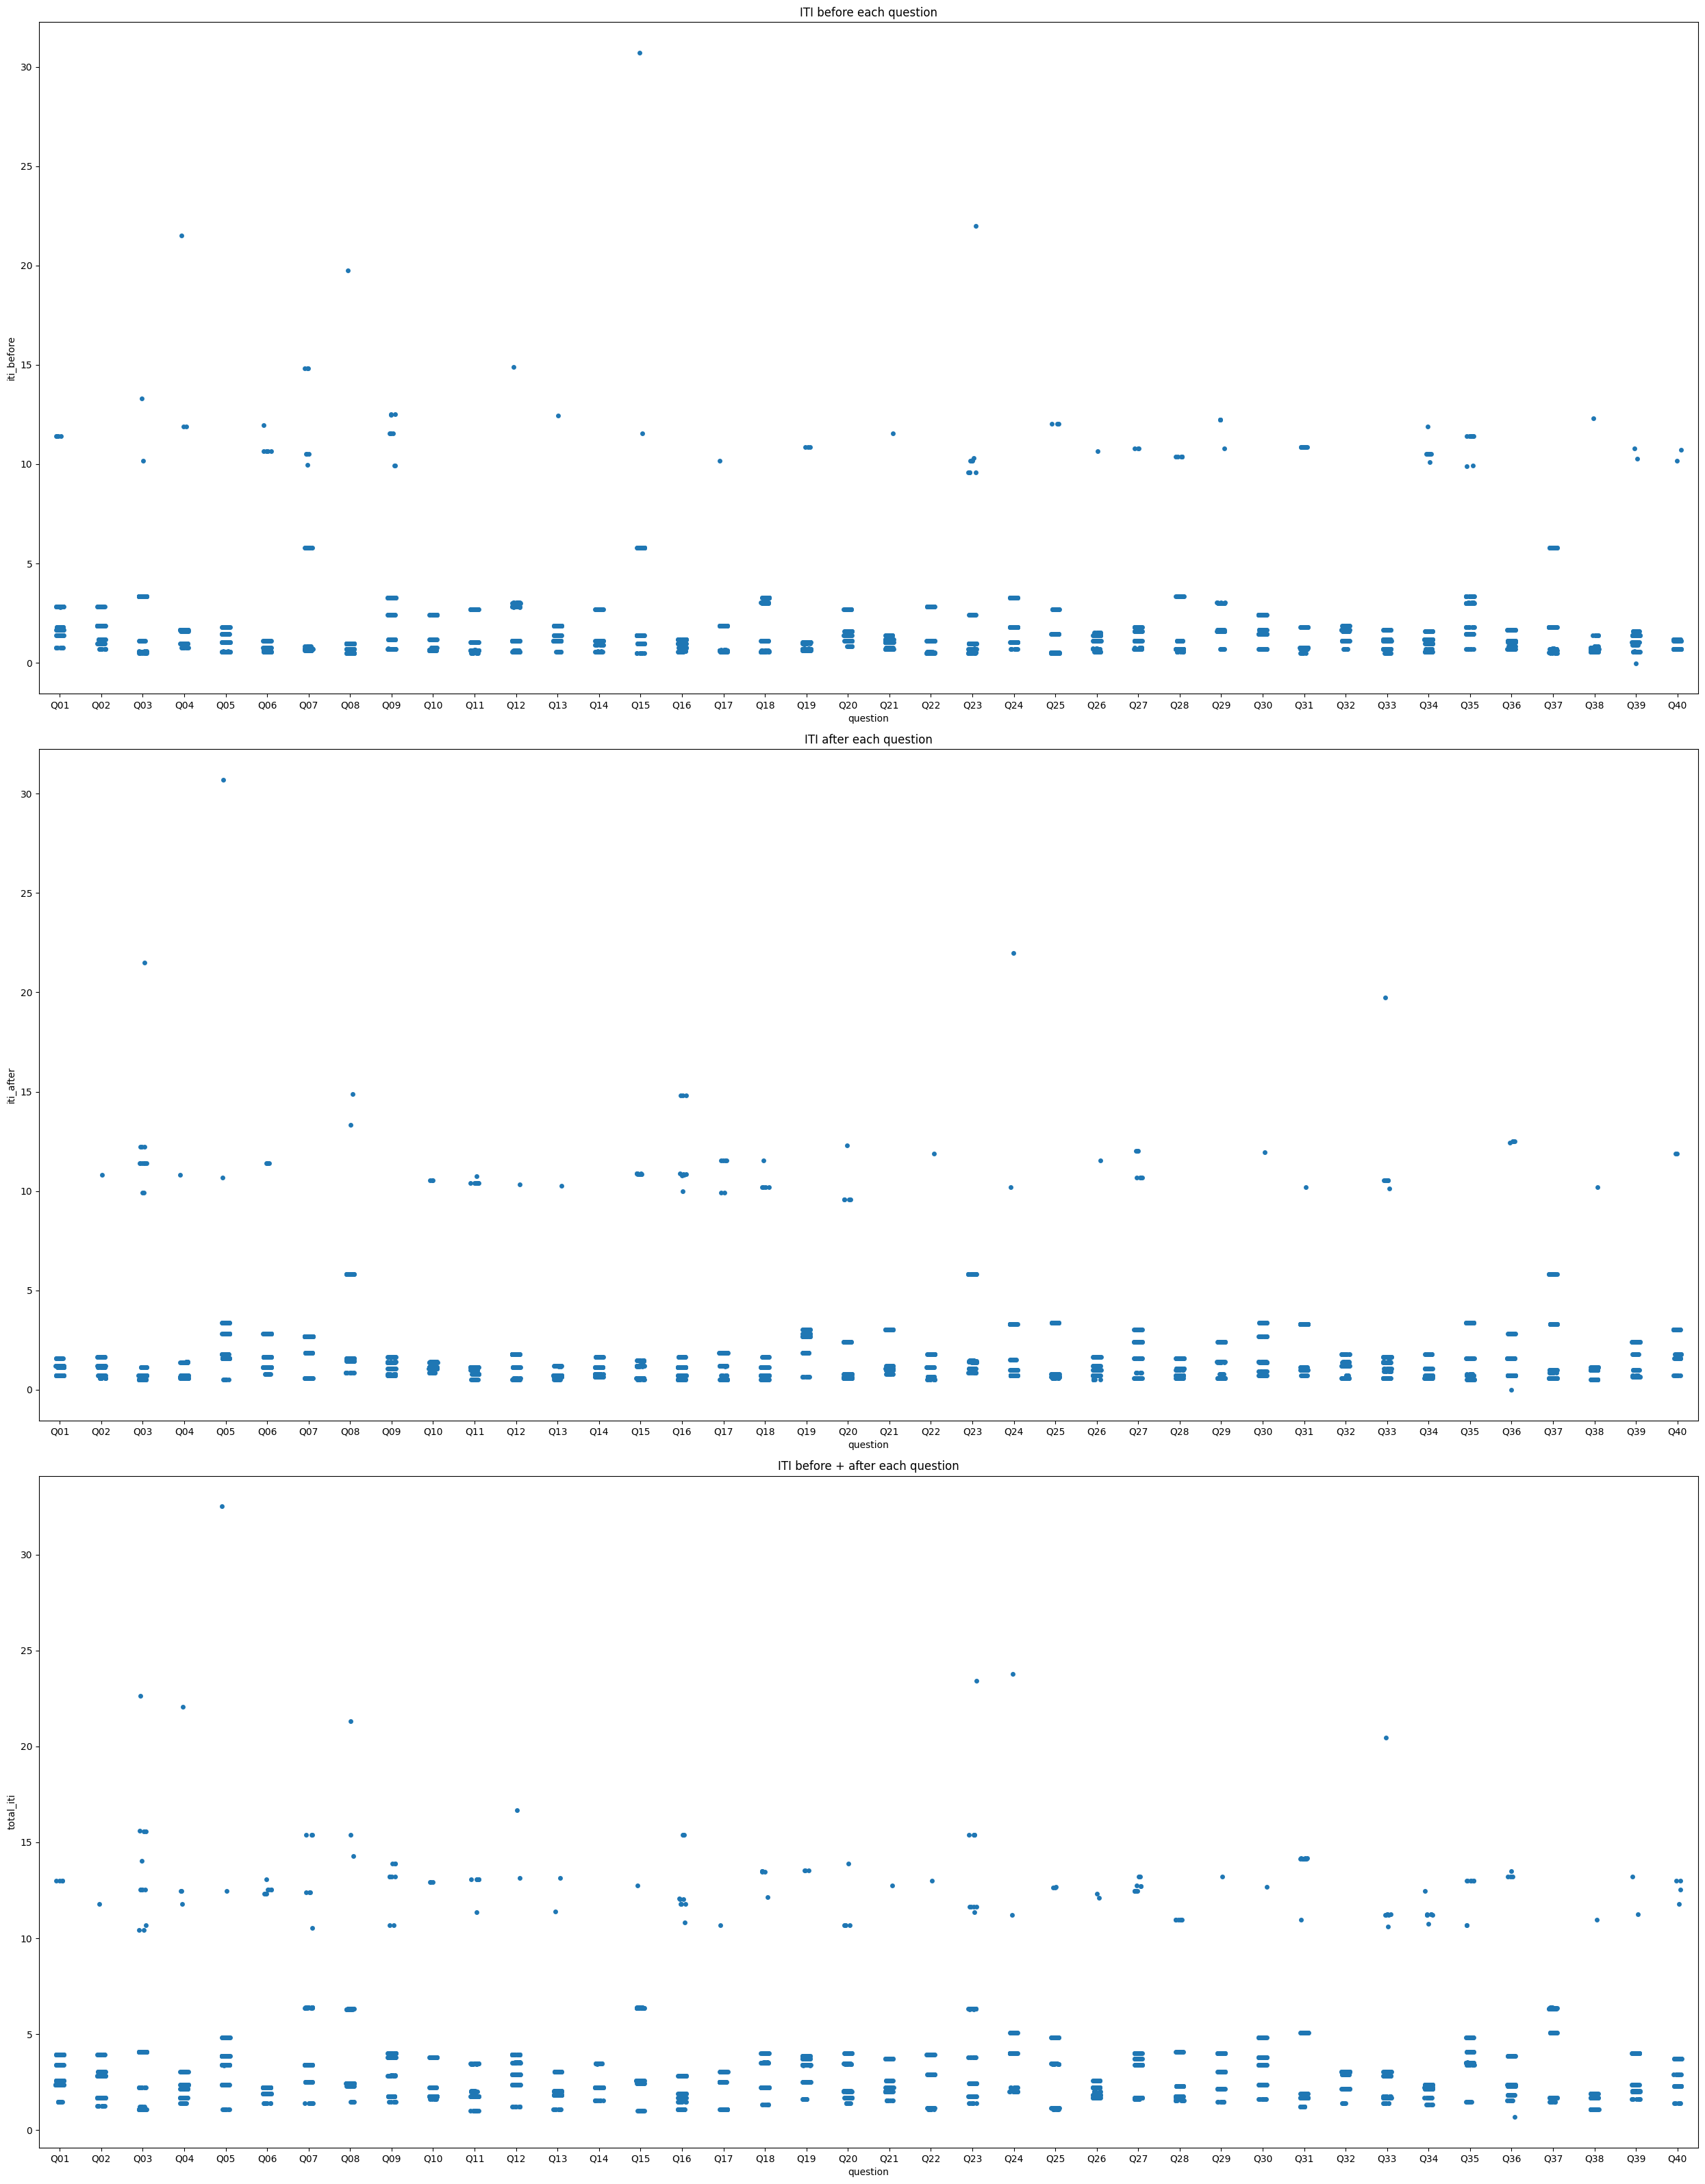

In [31]:
fig, axes = plt.subplots(3, 1, figsize=(25, 32))

sns.stripplot(x='question', y='iti_before', data=all_iti, ax=axes[0])
axes[0].set_title('ITI before each question')
sns.stripplot(x='question', y='iti_after', data=all_iti, ax=axes[1])
axes[1].set_title('ITI after each question')
sns.stripplot(x='question', y='total_iti', data=all_iti, ax=axes[2])
axes[2].set_title('ITI before + after each question')
plt.tight_layout()
plt.show()